# p01: Convergence of fourth order finite differences

Let us compute the derivative of
$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$
using fourth order finite difference scheme
$$
u'(x_j) \approx w_j = \frac{1}{h} \left( \frac{1}{12} u_{j-2} - \frac{2}{3} u_{j-1} + \frac{2}{3} u_{j+1} - \frac{1}{12} u_{j+2} \right)
$$
using periodic boundary conditions.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.sparse import coo_matrix
from numpy import arange,pi,exp,sin,cos,ones,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,semilogy,text,grid,xlabel,ylabel,title

c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


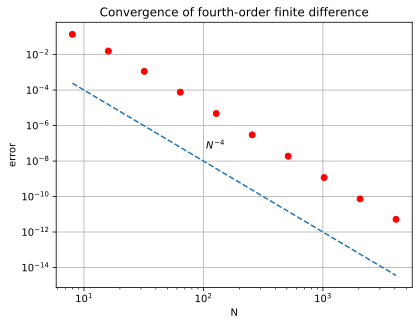

In [2]:
Nvec = 2**arange(3,13)
for N in Nvec:
    h = 2*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u
    e = ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(2,N+2); e3[N-2]=0; e3[N-1]=1;
    D = coo_matrix((2*e/3,(e1,e2)),shape=(N,N)) \
        - coo_matrix((e/12,(e1,e3)),shape=(N,N))
    D = (D - D.T)/h
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    
semilogy(Nvec,Nvec**(-4.0),'--')
text(105,5e-8,'$N^{-4}$')
grid(True); xlabel('N'); ylabel('error')
title('Convergence of fourth-order finite difference');

## Exercise 1

Find sixth and eigth order finite differences, implement them and make error plot as above.


Here we use `sumpy` package to compute the coefficients of the interpolation polynomial.

In [54]:
import sympy as sp

x, h = sp.symbols('x h')
xj = [-3*h, -2*h, -h, 0, h, 2*h, 3*h]
uj = sp.symbols('u0:7')

pj = 0
for j in range(7):
    Lj = 1
    for m in range(7):
        if m != j:
            Lj *= (x - xj[m]) / (xj[j] - xj[m])
    pj += uj[j] * Lj

pj_derivative = sp.diff(pj, x)
pj_derivative.simplify()

(-12*h**5*u0 + 108*h**5*u1 - 540*h**5*u2 + 540*h**5*u4 - 108*h**5*u5 + 12*h**5*u6 + 8*h**4*u0*x - 108*h**4*u1*x + 1080*h**4*u2*x - 1960*h**4*u3*x + 1080*h**4*u4*x - 108*h**4*u5*x + 8*h**4*u6*x + 45*h**3*u0*x**2 - 360*h**3*u1*x**2 + 585*h**3*u2*x**2 - 585*h**3*u4*x**2 + 360*h**3*u5*x**2 - 45*h**3*u6*x**2 - 20*h**2*u0*x**3 + 240*h**2*u1*x**3 - 780*h**2*u2*x**3 + 1120*h**2*u3*x**3 - 780*h**2*u4*x**3 + 240*h**2*u5*x**3 - 20*h**2*u6*x**3 - 15*h*u0*x**4 + 60*h*u1*x**4 - 75*h*u2*x**4 + 75*h*u4*x**4 - 60*h*u5*x**4 + 15*h*u6*x**4 + 6*u0*x**5 - 36*u1*x**5 + 90*u2*x**5 - 120*u3*x**5 + 90*u4*x**5 - 36*u5*x**5 + 6*u6*x**5)/(720*h**6)

In [55]:
import sympy as sp

x, h = sp.symbols('x h')
xj = [-4*h,-3*h, -2*h, -h, 0, h, 2*h, 3*h, 4*h]
uj = sp.symbols('u0:9')

pj = 0
for j in range(9):
    Lj = 1
    for m in range(9):
        if m != j:
            Lj *= (x - xj[m]) / (xj[j] - xj[m])
    pj += uj[j] * Lj

pj_derivative = sp.diff(pj, x)
pj_derivative.simplify()

(36*h**7*u0 - 384*h**7*u1 + 2016*h**7*u2 - 8064*h**7*u3 + 8064*h**7*u5 - 2016*h**7*u6 + 384*h**7*u7 - 36*h**7*u8 - 18*h**6*u0*x + 256*h**6*u1*x - 2016*h**6*u2*x + 16128*h**6*u3*x - 28700*h**6*u4*x + 16128*h**6*u5*x - 2016*h**6*u6*x + 256*h**6*u7*x - 18*h**6*u8*x - 147*h**5*u0*x**2 + 1512*h**5*u1*x**2 - 7098*h**5*u2*x**2 + 10248*h**5*u3*x**2 - 10248*h**5*u5*x**2 + 7098*h**5*u6*x**2 - 1512*h**5*u7*x**2 + 147*h**5*u8*x**2 + 49*h**4*u0*x**3 - 672*h**4*u1*x**3 + 4732*h**4*u2*x**3 - 13664*h**4*u3*x**3 + 19110*h**4*u4*x**3 - 13664*h**4*u5*x**3 + 4732*h**4*u6*x**3 - 672*h**4*u7*x**3 + 49*h**4*u8*x**3 + 70*h**3*u0*x**4 - 630*h**3*u1*x**4 + 1820*h**3*u2*x**4 - 2030*h**3*u3*x**4 + 2030*h**3*u5*x**4 - 1820*h**3*u6*x**4 + 630*h**3*u7*x**4 - 70*h**3*u8*x**4 - 21*h**2*u0*x**5 + 252*h**2*u1*x**5 - 1092*h**2*u2*x**5 + 2436*h**2*u3*x**5 - 3150*h**2*u4*x**5 + 2436*h**2*u5*x**5 - 1092*h**2*u6*x**5 + 252*h**2*u7*x**5 - 21*h**2*u8*x**5 - 7*h*u0*x**6 + 42*h*u1*x**6 - 98*h*u2*x**6 + 98*h*u3*x**6 - 98*h*u5*x**

In [39]:
x-xj[m]

2*h

In [37]:
m = 1
(x - xj[m]) / (xj[j] - xj[m])

2/5

Text(0.5, 1.0, 'Convergence of sixth-order finite difference')

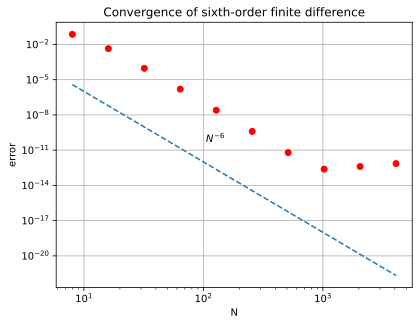

In [57]:
# Exercise 1
Nvec = 2**arange(3,13)
for N in Nvec:
    h = 2*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u
    e = ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(2,N+2); e3[N-2]=0; e3[N-1]=1;
    e4 = arange(3, N + 3); e4[N-3] = 0; e4[N-2] = 1; e4[N-1] = 2;
    D = coo_matrix((1/60*e,(e1,e4)),shape=(N,N)) \
        - coo_matrix((3/20*e,(e1,e3)),shape=(N,N)) \
        + coo_matrix((3/4*e,(e1,e2)),shape=(N,N)) 
    D = (D - D.T)/h
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    
semilogy(Nvec,Nvec**(-6.0),'--')
text(105,5e-11,'$N^{-6}$')
grid(True); xlabel('N'); ylabel('error')
title('Convergence of sixth-order finite difference')

Text(0.5, 1.0, 'Convergence of eighth-order finite difference')

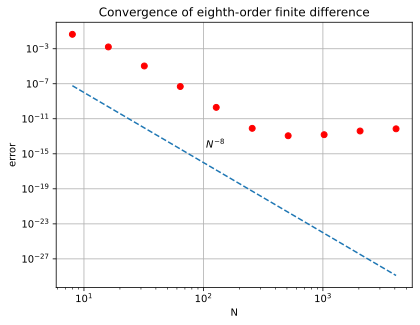

In [58]:
Nvec = 2**arange(3,13)
for N in Nvec:
    h = 2*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u
    e = ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(2,N+2); e3[N-2]=0; e3[N-1]=1;
    e4 = arange(3, N + 3); e4[N-3] = 0; e4[N-2] = 1; e4[N-1] = 2;
    e5 = arange(4, N + 4); e5[N-4] = 0; e5[N-3] = 1; e5[N-2] = 2; e5[N-1] = 3;
    D = coo_matrix((-1/280*e,(e1,e5)),shape=(N,N)) \
        + coo_matrix((4/105*e,(e1,e4)),shape=(N,N)) \
        - coo_matrix((1/5*e,(e1,e3)),shape=(N,N)) \
        + coo_matrix((4/5*e,(e1,e2)),shape=(N,N)) 
    D = (D - D.T)/h
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    
semilogy(Nvec,Nvec**(-8.0),'--')
text(105,5e-15,'$N^{-8}$')
grid(True); xlabel('N'); ylabel('error')
title('Convergence of eighth-order finite difference')

## Exercise

Construct the differentiation matrix using `toeplitz` function. You need to pass the first column and first row.